In [1]:
import numpy as np
import pandas as pd
import json
from IPython.display import Image
import os
import shutil
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf

In [47]:
# !gdown  https://drive.google.com/uc?id=1oJDrdWoddJQM0NJXI3XGChmf68FovQ7_
!gdown  https://drive.google.com/uc?id=1Mk7ba7g2SiUVpBTH1oCNwJhWT-pDoioN

Downloading...
From: https://drive.google.com/uc?id=1Mk7ba7g2SiUVpBTH1oCNwJhWT-pDoioN
To: /home/jupyter/obj-detect/part_2.zip
12.4GB [01:54, 108MB/s] 


In [32]:
f = open('fsod_train.json')

data = json.load(f)
print(data.keys())

dict_keys(['images', 'type', 'annotations', 'categories'])


In [64]:
print(data['images'][0])
print(data['annotations'][0])
print(data['categories'][0])

{'id': 2019000000000, 'file_name': 'part_2/train_part_e/e8/e8fe15d38a65c26b.jpg', 'width': 1024, 'height': 719}
{'ignore': 0, 'image_id': 2019000000000, 'segmentation': 0, 'bbox': [393.0, 347.0, 48.0, 42.0], 'area': 0.0, 'category_id': 1, 'iscrowd': 0, 'id': 0}
{'supercategory': 'cosmetics', 'id': 1, 'name': 'lipstick'}


In [62]:
cates = set()
for cat in data['categories']:
    if cat['supercategory'] == 'vegetable':
        if cat['name'] in ['broccoli', 'cabbage']:
            cates.add(cat['id'])
print(cates)

{121, 127}


In [63]:
count = 0
ann_ = []
_temp = {}
for d in data['annotations']:
    if(d['category_id'] in [121, 127]):
        _temp = d.copy()
        ann_.append(_temp)
        count += 1
print(count)

590


In [68]:
count = 0
for img in data['images']:
    for an in ann_:
        if img['id'] == an['image_id']:
            count +=1
print(count)

590


In [75]:
data['images'][1]

{'id': 2019000000001,
 'file_name': 'part_2/train_part_0/01/01b690a4a6435003.jpg',
 'width': 1024,
 'height': 576}

In [77]:
for c in data['images']:
    if c['file_name'] == 'part_2/train_part_0/01/01b690a4a6435003.jpg':
        print(c)

{'id': 2019000000001, 'file_name': 'part_2/train_part_0/01/01b690a4a6435003.jpg', 'width': 1024, 'height': 576}


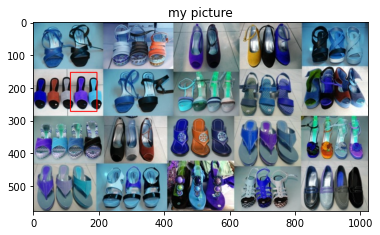

In [76]:
img = cv2.imread('part_2/train_part_0/01/01b690a4a6435003.jpg') 
ak = cv2.rectangle(img, [114, 153, 82, 120], (255,0,0), 2)
plt.imshow(ak)
plt.title('my picture')
plt.show()

In [45]:
f = open('new_ann.json')

f = json.load(f)
for k in f:
    if k['image_id'] == 2019000000000:
        print(k)

In [ ]:
two = []
for dic in data:
    if dic["name"] in ["broccoli", "cabbage"]:
        dst = dic["path"].split("/")[-1]
        
        shutil.copyfile(dic["path"], f"two_objects/{dst}")
        temp = dic.copy()
        temp["path"] = f"two_objects/{dst}"
        temp["height"] = 416
        temp["width"] = 416
        two.append(temp)
    

In [128]:
two = []
for dic in data:
    if dic["name"] in ["broccoli", "cabbage"]:
#         dst = dic["path"].split("/")[-1]
        
#         shutil.copyfile(dic["path"], f"two_objects/{dst}")
        temp = dic.copy()
        
        two.append(temp)

In [129]:
with open('two_ann.json', 'w', encoding='utf-8') as f:
    json.dump(two, f, ensure_ascii=False, indent=4)

In [130]:
f = open('two_ann.json')

data = json.load(f)
print(data[10:15])

[{'category_id': 127, 'image_id': 2019000001798, 'path': 'resized_imgs/139.jpg', 'name': 'cabbage', 'bbox': [0, 0, 265, 183], 'height': 685, 'width': 1024, 'yolo_norm_bbox': [0.31850961538461536, 0.21995192307692307, 0.6370192307692307, 0.43990384615384615]}, {'category_id': 121, 'image_id': 2019000002221, 'path': 'resized_imgs/174.jpg', 'name': 'broccoli', 'bbox': [234, 238, 54, 121], 'height': 768, 'width': 1024, 'yolo_norm_bbox': [0.6274038461538461, 0.7175480769230769, 0.12980769230769232, 0.29086538461538464]}, {'category_id': 127, 'image_id': 2019000002360, 'path': 'resized_imgs/186.jpg', 'name': 'cabbage', 'bbox': [0, 0, 416, 298], 'height': 763, 'width': 1024, 'yolo_norm_bbox': [0.5, 0.3581730769230769, 1.0, 0.7163461538461539]}, {'category_id': 121, 'image_id': 2019000002818, 'path': 'resized_imgs/226.jpg', 'name': 'broccoli', 'bbox': [114, 153, 82, 120], 'height': 768, 'width': 1024, 'yolo_norm_bbox': [0.37259615384615385, 0.5120192307692307, 0.1971153846153846, 0.28846153846

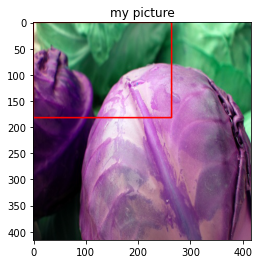

In [4]:
img = cv2.imread('two_objects/226.jpg') 
ak = cv2.rectangle(img, [114, 153, 82, 120], (255,0,0), 2)
plt.imshow(ak)
plt.title('my picture')
plt.show()

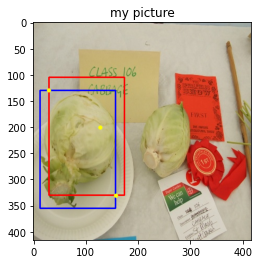

In [14]:
img = cv2.imread('resized_imgs/12.jpg') 
ak = cv2.rectangle(img, [13, 130, 145, 226], (255,0,0), 2)
ak = cv2.rectangle(img, [30, 105, 145, 226], (0,0,255), 2)
# ak = cv2.circle(img, (85, 243), radius=4, color=(0, 0, 255), thickness=-1)
ak = cv2.circle(img, (30 , 130), radius=4, color=(0, 255, 255), thickness=-1)
ak = cv2.circle(img, (158, 331), radius=4, color=(0, 255, 255), thickness=-1)
ak = cv2.circle(img, (128, 201), radius=4, color=(0, 255, 255), thickness=-1)
plt.imshow(ak[...,::-1])
plt.title('my picture')
plt.show()
#0 0.205529 0.584135 0.348558 0.543269
# 1 0.485577 0.515625 0.966346 0.862981

In [21]:
print(int((0.205529 - (0.348558/2)) * 416))
print(int((0.584135 - (0.543269/2)) * 416))
print(int((0.348558 * 416)))
print(int((0.543269 * 416)))     

13
130
145
225


In [27]:
print(((30 + 30 + 145 ) / 2 ) / 416)
print(((105 + 105 + 226 ) / 2 ) / 416)
print(145 / 416)
print(226 / 416)

0.24639423076923078
0.5240384615384616
0.3485576923076923
0.5432692307692307


[30, 105, 145, 226]

In [3]:
# box1 = [13, 130, 13 + 145, 130 + 226]
# box2 = [30, 105,30 + 145, 105 + 226]
box1 = [0.71754808, 0.63341346, 0.49759615, 0.58894231]
box2 = [0.81754808, 0.53341346, 0.49759615, 0.58894231]

def iou(b1, b2):
    
    x1, y1, w1, h1 = int((b1[0] - (b1[2]/2)) * 416 ), \
                    int((b1[1] - (b1[3]/2)) * 416 ), \
                    int(b1[2] * 416), \
                    int(b1[3] * 416)
    
    x2, y2, w2, h2 = int((b2[0] - (b2[2]/2)) * 416 ), \
                    int((b2[1] - (b2[3]/2)) * 416 ), \
                    int(b2[2] * 416), \
                    int(b2[3] * 416)
    
    
    
    c_b1  = [ x1, y1, w1 + x1, h1 + y1 ]
    c_b2  = [ x2, y2, w2 + x2, h2 + y2 ]
    
    xi1 = max(c_b1[0], c_b2[0])
    yi1 = max(c_b1[1], c_b2[1])
    xi2 = min(c_b1[2], c_b2[2])
    yi2 = min(c_b1[3], c_b2[3])
    inter_area = (xi2 - xi1)*(yi2 - yi1)
    print(x1, y1, w1, h1)
    print(x2, y2, w2, h2)
    
    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = (box1_area + box2_area) - inter_area

    iou = inter_area / union_area
    
    return iou

print(iou(box1, box2))
# xi1 = max(box1[0], box2[0])
# yi1 = max(box1[1], box2[1])
# xi2 = min(box1[2], box2[2])
# yi2 = min(box1[3], box2[3])
# inter_area = (xi2 - xi1)*(yi2 - yi1)

195 140 206 245
236 99 206 245
0.5002972651605232


In [32]:
np.random.seed(0)
test_arr = np.random.randn(13, 13, 7)
test = test_arr[:, :, 1: 5]
print(test.shape)

(13, 13, 4)


In [ ]:
def custom_mean_squared_error(y_true, y_pred):
    return tf.math.reduce_mean(tf.square(y_true - y_pred))


In [ ]:
def iou_3d(b1, b2):
    
    x1, y1, w1, h1 = (b1[:, :, 0].dtype('int') - (b1[:, :, 2].dtype('int') / 2))* 416 , \
                     (b1[:, :, 1].dtype('int') - (b1[:, :, 3].dtype('int') / 2)) * 416 , \
                     b1[:, :, 2].dtype('int') * 416, \
                     b1[:, :, 3].dtype('int') * 416
    
    x2, y2, w2, h2 = (b2[:, :, 0].dtype('int') - (b2[:, :, 2].dtype('int')/2)) * 416 , \
                    (b2[:, :, 1].dtype('int') - (b2[:, :, 3].dtype('int')/2)) * 416 , \
                     b2[:, :, 2].dtype('int') * 416, \
                     b2[:, :, 3].dtype('int') * 416
    
    
    
    c_b1  = [ x1, y1, w1 + x1, h1 + y1 ]
    c_b2  = [ x2, y2, w2 + x2, h2 + y2 ]
    
    xi1 = max(c_b1[:, :, 0], c_b2[:, :, 0])
    yi1 = max(c_b1[:, :, 1], c_b2[:, :, 1])
    xi2 = min(c_b1[:, :, 2], c_b2[:, :, 2])
    yi2 = min(c_b1[:, :, 3], c_b2[:, :, 3])
    inter_area = (xi2 - xi1)*(yi2 - yi1)
    print(x1, y1, w1, h1)
    print(x2, y2, w2, h2)
    
    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = (box1_area + box2_area) - inter_area

    iou = inter_area / union_area
    
    return iou

In [17]:
((13 + 13 + 145 ))/2/416

0.20552884615384615

In [16]:
(0.20552884615384615 * 2 * 416) - (13 + 145)

13.0

In [7]:
(130 + 130 + 226 )/2 /416

0.5841346153846154

In [3]:
226/416

0.5432692307692307

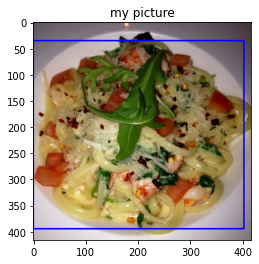

In [7]:
img = cv2.imread('resized_imgs/14.jpg') 
ak = cv2.rectangle(img, [0, 35, 403, 360], (255,0,0), 2)
plt.imshow(ak[...,::-1])
plt.title('my picture')
plt.show()
# 1 0.485577 0.515625 0.966346 0.862981

In [4]:
(( 403 )/2)

201.5

In [5]:
201.5/416

0.484375

In [8]:
yolo_ann = []
for dic in data:
    temp = dic.copy()
    
    arr = temp["bbox"]
    x_center = ((arr[0] + arr[0] + arr[2] ) / 2 ) / 416
    y_center = ((arr[1] + arr[1] + arr[3] ) / 2 ) / 416
    
    width = arr[2] / 416
    height = arr[3] / 416
 
    temp['yolo_norm_bbox'] = [x_center, y_center, width, height] 
    yolo_ann.append(temp)
    

In [13]:
94/416

0.22596153846153846

In [10]:
yolo_ann[:4]

[{'category_id': 34,
  'image_id': 2019000000033,
  'path': 'resized_imgs/1.jpg',
  'name': 'strawberry',
  'bbox': [174, 170, 94, 123],
  'height': 682,
  'width': 1024,
  'yolo_norm_bbox': [0.53125,
   0.5564903846153846,
   0.22596153846153846,
   0.2956730769230769]},
 {'category_id': 48,
  'image_id': 2019000000048,
  'path': 'resized_imgs/2.jpg',
  'name': 'tomato',
  'bbox': [195, 181, 61, 30],
  'height': 1024,
  'width': 1024,
  'yolo_norm_bbox': [0.5420673076923077,
   0.47115384615384615,
   0.1466346153846154,
   0.07211538461538461]},
 {'category_id': 53,
  'image_id': 2019000000053,
  'path': 'resized_imgs/3.jpg',
  'name': 'hip',
  'bbox': [111, 256, 68, 148],
  'height': 375,
  'width': 500,
  'yolo_norm_bbox': [0.3485576923076923,
   0.7932692307692307,
   0.16346153846153846,
   0.3557692307692308]},
 {'category_id': 57,
  'image_id': 2019000000057,
  'path': 'resized_imgs/4.jpg',
  'name': 'carrot',
  'bbox': [279, 364, 80, 43],
  'height': 768,
  'width': 1024,
  'y

In [12]:
with open('yolo_ann.json', 'w', encoding='utf-8') as f:
    json.dump(yolo_ann, f, ensure_ascii=False, indent=4)

In [16]:
from PIL import Image, ImageDraw
import random
import string
import numpy as np

def one_hot(x, length):
    return [1 if x==i else 0 for i in range(length)]

def get_word(c):
    words = ["chat", "rat", "none"]
    return (words[c], one_hot(c,len(words)))

cell_w = 32
cell_h = 32
grid_w = 2
grid_h = 2

for j in range(0,5):
    img = Image.new('RGB', (grid_w*cell_w,grid_h*cell_h))
    d = ImageDraw.Draw(img)
    
    with open('Labels/%d.txt' % j,'w+') as f:
     
        for row in range(grid_w):
            for col in range(grid_h):

                (digits, cat) = get_word(random.randint(0,2))

                width = len(digits)*6
                
                if(digits=='none'):
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]) )        
                    f.write('%d %d %d %d\n' % ( col*cell_w+cell_w/2, row*cell_h+cell_h/2, cell_w, cell_h ))
                    f.write('0\n') # confidence of object
                    print("None", (col,row), (col*cell_w+cell_w/2, row*cell_h+cell_h/2, cell_w, cell_h), 0)
                else:
                    x = random.randrange(col*cell_w, (col+1)*cell_w)
                    y = random.randrange(row*cell_w, min(67, (row+1)*cell_h))
                    
                    d.text((x-width/2, y-10/2), digits, fill=(255,255,255))
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]))
                    f.write('%d %d %d %d\n' % (x, y, width, 10) )
                    f.write('1\n') # confidence of object
                    print("Objt", (col,row), (x, y, width, 10), 1)
        
        f.write('---\n')

    img.save('Images/%d.PNG' % j)

Objt (0, 0) (25, 18, 24, 10) 1
Objt (1, 0) (43, 5, 18, 10) 1
Objt (0, 1) (11, 48, 24, 10) 1
Objt (1, 1) (55, 53, 18, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (51, 43, 24, 10) 1
Objt (0, 0) (17, 17, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (23, 37, 24, 10) 1
Objt (1, 1) (57, 38, 18, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (44, 25, 18, 10) 1
Objt (0, 1) (24, 44, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (14, 13, 18, 10) 1
Objt (1, 0) (39, 20, 24, 10) 1
Objt (0, 1) (30, 38, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [53]:
img_inputs = keras.Input(shape=(416, 416, 3))

x = layers.Conv2D(64, (7, 7), strides=2)(img_inputs)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)

x = layers.Conv2D(192, (7, 7))(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)

x = layers.Conv2D(256, (6, 6), strides=3)(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Conv2D(256, (1, 1))(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Conv2D(128, (3, 3))(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Conv2D(7, (1, 1), activation="linear")(x)

model = keras.Model(img_inputs, x, name="obj")
model.summary()

Model: "obj"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 416, 416, 3)]     0         
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 205, 205, 64)      9472      
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 205, 205, 64)      0         
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 102, 102, 64)      0         
_________________________________________________________________
conv2d_199 (Conv2D)          (None, 96, 96, 192)       602304    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 96, 96, 192)       0         
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 48, 48, 192)       0       

In [35]:
416/(2*2*2*2*)

13.0

In [ ]:
[(w-k)/S] + 1 = 13
42 - k = 12S
42 - 12 = k 

In [57]:
416/13

32.0

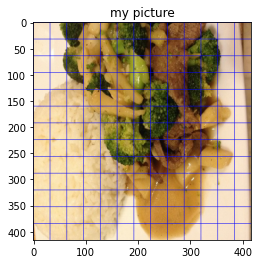

In [62]:
img = cv2.imread("two_objects/9985.jpg")
GRID_SIZE = 32

height, width, channels = img.shape
for x in range(0, width -1, GRID_SIZE):
    cv2.line(img, (x, 0), (x, height), (255, 0, 0), 1, 1)
    cv2.line(img, (0, x), (width, x), (255, 0, 0), 1, 1)


plt.imshow(img[...,::-1])
plt.title('my picture')
plt.show()

In [64]:
13* 13

169

In [155]:
dic = {}
grid_i = {}
count = 1
for i in range(0, 13):
    #row
    for j in range(0, 13):
        #column
        center = (32 * i + 16 , 32 * j + 16 ) 
        dic[count] = center
        grid_i[count]=(i, j)
        count += 1

In [156]:
len(dic)
dic[169]
grid_i.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169])

In [133]:
with open('center.json', 'w', encoding='utf-8') as f:
    json.dump(dic, f, ensure_ascii=False, indent=4)

In [144]:
with open('grid_i.json', 'w', encoding='utf-8') as f:
    json.dump(grid_i, f, ensure_ascii=False, indent=4)

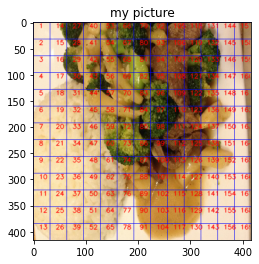

In [120]:
img = cv2.imread('resized_imgs/9985.jpg') 

GRID_SIZE = 32

height, width, channels = img.shape
for x in range(0, width -1, GRID_SIZE):
    cv2.line(img, (x, 0), (x, height), (255, 0, 0), 1, 1)
    cv2.line(img, (0, x), (width, x), (255, 0, 0), 1, 1)

for key in dic.keys():
    org = tuple(np.asarray(dic[key]) - 5)
    ak = cv2.putText(img, str(key), org, cv2.FONT_HERSHEY_SIMPLEX, 
                   0.4, (0, 0, 255), 1, cv2.LINE_AA)
#     ak = cv2.circle(img, dic[key], radius=4, color=(0, 0, 255), thickness=-1)

plt.imshow(ak[...,::-1])
plt.title('my picture')
plt.show()

In [149]:
# grid_i for numpy index
# yolo_norm_center for normalized x,y coordinate

print(dic[6], grid_i[6], yolo_norm_center['6'])

(16, 176) (0, 5) (0.038461538461538464, 0.4230769230769231)


In [136]:
f = open('center.json')

dic = json.load(f)
print(dic['1'])

[16, 16]


In [137]:
yolo_norm_center = {}
for key in dic.keys():
    x = dic[key][0] / 416
    y = dic[key][1] / 416
    
    yolo_norm_center[key] = (x, y)

In [138]:
len(yolo_norm_center)

169

In [139]:
with open('yolo_norm_center.json', 'w', encoding='utf-8') as f:
    json.dump(yolo_norm_center, f, ensure_ascii=False, indent=4)

In [141]:
yolo_norm_center['59']

(0.34615384615384615, 0.5)

In [ ]:
grid_i = {}
for key in yolo_norm_center.keys():
    

In [83]:
def get_closest_key():

16.0

In [142]:
temp_np = np.zeros((13, 13, 7), dtype=np.float)

In [157]:
grid_i = open('grid_i.json')
yolo_norm_center = open('yolo_norm_center.json')

grid_i = json.load(grid_i)
yolo_norm_center = json.load(yolo_norm_center)
print(yolo_norm_center['1'], grid_i['1'])

[0.038461538461538464, 0.038461538461538464] [0, 0]


In [ ]:
def find_grid():

In [17]:
f = open('two_ann.json')
grid_i = open('grid_i.json')
yolo_norm_center = open('yolo_norm_center.json')

dic = json.load(f)
grid_i = json.load(grid_i)
yolo_norm_center = json.load(yolo_norm_center)
# Objt (0, 0) (25, 18, 24, 10) 1
for a in dic:
#     print(a)
    x1 = a["yolo_norm_bbox"][0]
    y1 = a["yolo_norm_bbox"][1]
    width = a["yolo_norm_bbox"][2]
    height = a["yolo_norm_bbox"][3]
    
    name = {'cabbage' : (1, 0), 'broccoli': (0, 1)}
    
    clas = name[a["name"]]
    _min = 100 
    _min_grid = (0,0)
    _temp_arr = np.zeros((13, 13, 7), dtype=np.float)
    
    for key in yolo_norm_center.keys():
        x2 = yolo_norm_center[key][0]
        y2 = yolo_norm_center[key][1]
        
        dist = np.sqrt((y2-y1)**2 + (x2-x1)**2)
        if dist < _min:
            _min = dist
            _min_grid = grid_i[key]
    
    _temp_arr[_min_grid[0], _min_grid[1], :] = np.array([1 , x1 ,y1, width, height, clas[0], clas[1]], dtype=np.float)
    
    np_name = a['path'].split("/")[-1].split(".")[0]
    
    with open(f"np_label/{np_name}.npy", 'wb') as f:
        np.save(f, _temp_arr)

#     print(np_name)
#     print(_temp_arr[_min_grid[0], _min_grid[1], :])
            
#     print(_min_grid)
#     print(dist)

print('finish')

# print(dic[:4])

finish


In [18]:
print(np_name)
print(_temp_arr[_min_grid[0], _min_grid[1], :])

print(_min_grid)
print(dist)

12442
[1.         0.25841346 0.27403846 0.08413462 0.19230769 0.
 1.        ]
[3, 3]
0.9833824360974727


In [19]:
with open('np_label/12442.npy', 'rb') as f:
    a = np.load(f)
a[3, 3, :]

array([1.        , 0.25841346, 0.27403846, 0.08413462, 0.19230769,
       0.        , 1.        ])

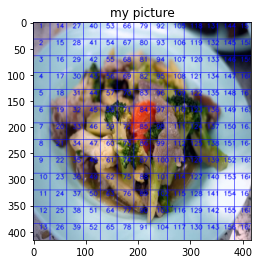

In [11]:
img = cv2.imread('resized_imgs/12442.jpg') 
dic = open('center.json')
dic = json.load(dic)

GRID_SIZE = 32

height, width, channels = img.shape
for x in range(0, width -1, GRID_SIZE):
    cv2.line(img, (x, 0), (x, height), (255, 0, 0), 1, 1)
    cv2.line(img, (0, x), (width, x), (255, 0, 0), 1, 1)

for key in dic.keys():
    org = tuple(np.asarray(dic[key]) - 5)
    ak = cv2.putText(img, str(key), org, cv2.FONT_HERSHEY_SIMPLEX, 
                   0.4, (255, 0, 0), 1, cv2.LINE_AA)
#     ak = cv2.circle(img, dic[key], radius=4, color=(0, 0, 255), thickness=-1)

plt.imshow(ak[...,::-1])
plt.title('my picture')
plt.show()

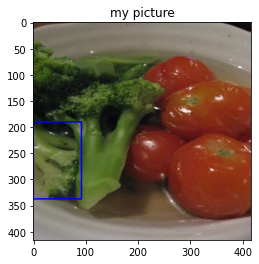

In [181]:
img = cv2.imread('resized_imgs/12442.jpg') 
ak = cv2.rectangle(img, [0, 190, 93, 148], (255,0,0), 2)
plt.imshow(ak[...,::-1])
plt.title('my picture')
plt.show()

In [154]:
grid_i.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157'

In [24]:
yolo_ann = open("two_ann.json")
yolo_ann = json.load(yolo_ann)
print(yolo_ann[:2])

[{'category_id': 121, 'image_id': 2019000000136, 'path': 'resized_imgs/11.jpg', 'name': 'broccoli', 'bbox': [59, 150, 70, 98], 'height': 768, 'width': 1024, 'yolo_norm_bbox': [0.22596153846153846, 0.47836538461538464, 0.16826923076923078, 0.23557692307692307]}, {'category_id': 127, 'image_id': 2019000000145, 'path': 'resized_imgs/12.jpg', 'name': 'cabbage', 'bbox': [13, 130, 145, 226], 'height': 768, 'width': 1024, 'yolo_norm_bbox': [0.20552884615384615, 0.5841346153846154, 0.3485576923076923, 0.5432692307692307]}]


In [30]:
yolo_ann = open("yolo_ann.json")
yolo_ann = json.load(yolo_ann)

for img in os.listdir("two_objects/"):
    if img.endswith(".jpg"):
        filename = img.split(".")[0]
        print(filename)
        with open(f'np_label/{filename}.npy', 'rb') as f:
            np_mat = np.load(f)
            
        front_facet = np_mat[:,:,0]
        i, j = np.where(front_facet == 1)
        for yolo_fmt in yolo_ann:
            if yolo_fmt['path'].split("/")[-1] == img:
                print(yolo_fmt['bbox'])
                print(yolo_fmt['yolo_norm_bbox'])
        print(i, j)
        break
    break

4189
[0, 66, 37, 61]
[0.04447115384615385, 0.23197115384615385, 0.0889423076923077, 0.1466346153846154]
[0] [3]


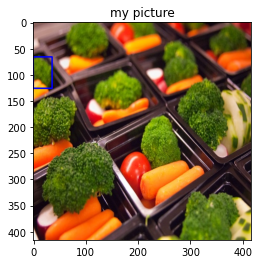

In [29]:
img = cv2.imread('two_objects/4189.jpg') 
ak = cv2.rectangle(img, [0, 66, 37, 61], (255,0,0), 2)
plt.imshow(ak[...,::-1])
plt.title('my picture')
plt.show()

In [28]:
3 * 32

96

In [5]:
np.random.seed(0)
def custom_mean_squared_error(y_true, y_pred):
    return tf.math.reduce_mean(tf.square(y_true - y_pred))

yt = np.random.randn(123, 122, 12, 100)
yp = np.random.randn(123, 122, 12, 100)
custom_mean_squared_error(yt, yp)

<tf.Tensor: shape=(), dtype=float64, numpy=1.998573056520868>